In [1]:
import numpy as np
from itertools import product
from matplotlib import pyplot as plt
import math
from scipy.linalg import expm, norm

In [2]:
N=20
space = np.array([*product(range(N), range(N), range(N))])
np.shape(space)

(8000, 3)

In [3]:
B = np.zeros((N*N*N,4))
B[:,:3] = space
B = np.reshape(B, (N,N,N,4))
B[:,:,:int(N/3),3] = .9
B[:,:,int(N/3):int(2*N/3),3] = .5
B[:,:,int(2*N/3):N,3] = 0.1
B = np.reshape(B, (-1,4))

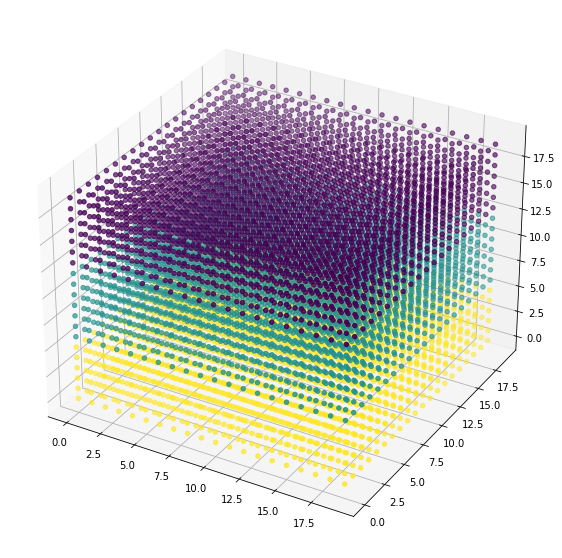

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
ax.scatter(B[:,0], B[:,1], B[:,2], c=B[:,3] )
plt.show()

In [5]:

# option 1
def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

# option 2
def rotation_matrix2(axis, theta):
    return expm(np.cross(np.eye(3), axis/norm(axis)* theta))

def dot_product(v):
    axis = [0, 0, 1] # vector to rotate
    theta = 45 # angle
    #return np.dot(rotation_matrix(axis, math.radians(theta)), v)
    return np.dot(rotation_matrix2(axis, math.radians(theta)), v)
 

 


In [6]:
B[:,:3] = np.apply_along_axis(dot_product, 1, B[:,:3])

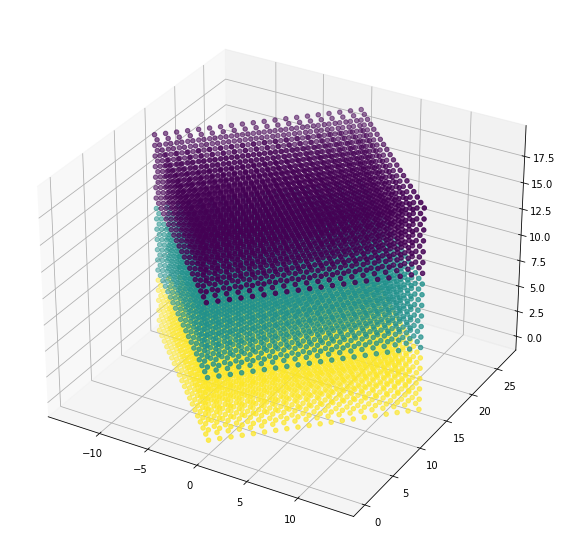

In [7]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
ax.scatter(B[:,0], B[:,1], B[:,2], c=B[:,3] )
plt.show()

# Othe  example
**note** the rotation is depends on the axis and angle. 

* the rotation matrix can be obtained using other methods 

* It is a lazy implementation, you can include axis and theta as function parameters

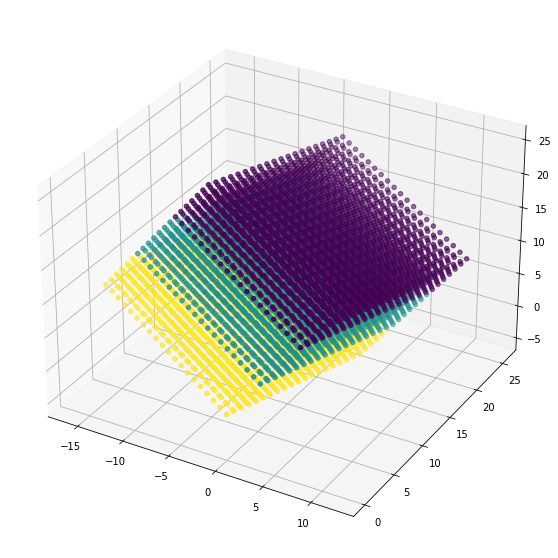

In [8]:
def dot_product(v):
    axis = [0, 1, 1] # vector to rotate
    theta = 45 # angle
    #return np.dot(rotation_matrix(axis, math.radians(theta)), v)
    return np.dot(rotation_matrix2(axis, math.radians(theta)), v)
 

B[:,:3] = np.apply_along_axis(dot_product, 1, B[:,:3])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
ax.scatter(B[:,0], B[:,1], B[:,2], c=B[:,3] )
plt.show()